In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
tf.__version__

'2.17.1'

In [3]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')
%matplotlib inline

summary:

Import Libraries:

pandas: Data manipulation and analysis.
numpy: Numerical operations and array handling.
os: Interact with the operating system.
warnings: Manage warnings in code.
matplotlib.pyplot: Create visualizations.
sklearn.model_selection.train_test_split: Split data into training and testing sets.
sklearn.preprocessing.MinMaxScaler: Normalize features to a range.
tensorflow.keras.models.Sequential: Build neural network models layer by layer.
tensorflow.keras.layers.Dense: Fully connected neural network layer.
tensorflow.keras.optimizers: Various optimization algorithms for training.
Suppress Warnings:

Ignore warnings during execution.
Inline Plotting:

Enable inline display of Matplotlib plots in Jupyter Notebooks.

In [6]:
df = pd.read_csv('data_boston.csv', header='infer', encoding='latin1')
X = df.drop(columns=['PRICE'])
y = df['PRICE']

In [ ]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Initialize Scaler: scaler = MinMaxScaler(): Creates an instance of the Min-Max scaler.
Scale Features: X = scaler.fit_transform(X): Scales the features in X to a range of [0, 1].
Summary:

Scaler: Create Min-Max scaler.
Transform: Scale X to [0, 1].

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
n_vars = X_train.shape[1]

Split Data: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123): Splits the scaled features X and target y into training (70%) and testing (30%) sets, with a fixed random seed for reproducibility.

Number of Features: n_vars = X_train.shape[1]: Gets the number of features in the training set.

Summary:
Data Split: 70% training, 30% testing.
Feature Count: n_vars = number of features in X_train.

In [9]:
my_model1 = Sequential()
my_model1.add(Dense(input_dim=n_vars, units=1, activation="linear"))

Initialize Model: my_model1 = Sequential(): Creates a sequential neural network model.

Add Layer: my_model1.add(Dense(input_dim=n_vars, units=1, activation="linear")): Adds a dense layer with n_vars input features, 1 output unit, and a linear activation function.

Summary:
Model: Create a sequential neural network.
Layer: Add a dense layer with n_vars inputs and 1 output (linear activation).

In [10]:
my_model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

The command my_model1.summary() is used to display a summary of the neural network model you have created with Keras. This summary provides a detailed overview of the model architecture, including the following information:


Layer Type: Lists each layer in the model (e.g., Dense).
Output Shape: Shows the shape of the output for each layer.
Param #: Displays the number of parameters (weights and biases) in each layer.

Total Params: The total number of parameters in the model.
Trainable Params: The number of parameters that can be updated during training.
Non-Trainable Params: The number of parameters that are fixed and not updated during training (if any).

In [13]:
n_epochs = 2000
batch_size = 10
learn_rate = 0.002

hyperparameters for training a neural network model. Here's a brief explanation of each parameter:

n_epochs = 2000: Specifies the number of complete passes through the training dataset. In this case, the model will be trained for 2000 epochs.

batch_size = 10: Defines the number of training samples used in one iteration of model training. Here, the model will update its weights after processing 10 samples at a time.

learn_rate = 0.002: Sets the learning rate, which controls how much to adjust the model weights in response to the estimated error each time the model weights are updated. A smaller learning rate (like 0.002) typically allows for more precise updates but may require more epochs to converge.

In [14]:
my_optimizer=Adam(learn_rate)
my_model1.compile(loss="mae", optimizer=my_optimizer, metrics=["mse"])

 initializes the Adam optimizer with a learning rate of 0.002, which influences the step size for minimizing the loss function during training. The model is compiled using Mean Absolute Error (MAE) as the loss function, providing a measure of average prediction errors without considering direction, making it suitable for regression tasks.

 Additionally, Mean Squared Error (MSE) is used as a metric to evaluate the model's performance, measuring the average squared differences between predicted and actual values. This configuration aims to effectively train the neural network while offering insights into its accuracy.

In [15]:
my_summary = my_model1.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                           validation_split=0.2, verbose=0)

In this code snippet, the fit method is called on my_model1 to train the model using the training data (X_train and y_train). The training process is configured to run for n_epochs, with a specified batch_size that determines how many samples are processed before the model's internal parameters are updated.

The validation_split parameter is set to 0.2, indicating that 20% of the training data will be used for validation to monitor the model's performance during training. The verbose parameter is set to 0, meaning that no training progress messages will be displayed in the output. The result of the training process is stored in the variable my_summary.

In [16]:
my_summary.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

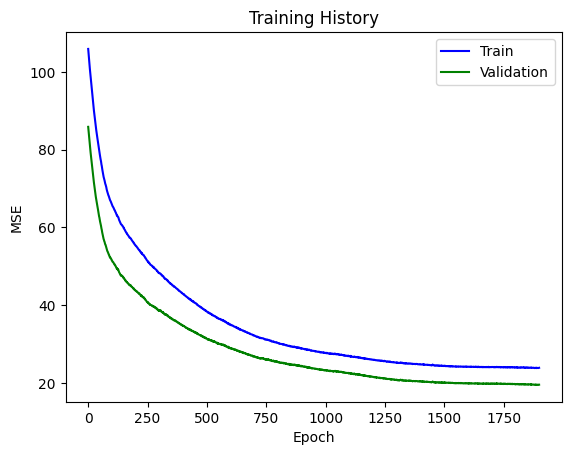

In [17]:
n_skip = 100
plt.plot(my_summary.history['mse'][n_skip:], c="b")
plt.plot(my_summary.history['val_mse'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [18]:
y_pred = my_model1.predict(X_test)[:, 0]
RMSE = np.sqrt(np.mean((y_test-y_pred)**2))
np.round(RMSE, 3)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


5.651

y_pred = my_model1.predict(X_test)[:, 0]: This line uses the trained model (my_model1) to make predictions on the test data (X_test). The [:, 0] selects the first column of the predicted output, which is useful if the model outputs multiple values (e.g., in multi-output regression).

RMSE = np.sqrt(np.mean((y_test - y_pred)**2)): This line calculates the Root Mean Squared Error (RMSE) between the actual test values (y_test) and the predicted values (y_pred). It does this by first computing the squared differences between the actual and predicted values, taking the mean of those squared differences, and then taking the square root of that mean.

np.round(RMSE, 3): Finally, this line rounds the RMSE value to three decimal places for easier interpretation.

In [19]:
MSE = my_model1.evaluate(X_test, y_test, verbose=0)[1]
RMSE = np.sqrt(MSE)
print("Test RMSE : {}".format(np.round(RMSE, 3)))

Test RMSE : 5.651


MSE = my_model1.evaluate(X_test, y_test, verbose=0)[1]: This line evaluates the model (my_model1) on the test dataset (X_test and y_test). The evaluate method returns a list, where the first element is the loss value (typically MSE if that's what the model was trained on) and the subsequent elements correspond to any additional metrics specified during model compilation. The [1] index retrieves the MSE value from this list. The verbose=0 argument suppresses output during the evaluation.

RMSE = np.sqrt(MSE): This line calculates the Root Mean Squared Error (RMSE) by taking the square root of the Mean Squared Error (MSE) obtained from the previous step.

print("Test RMSE : {}".format(np.round(RMSE, 3))): This line prints the RMSE value, rounding it to three decimal places for clarity. The formatted string includes the label "Test RMSE" followed by the rounded RMSE value.

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

The code imports essential components from TensorFlow Keras for building neural networks. The Model class enables the creation of models using the Functional API, allowing for complex architectures.

The Input layer defines the shape of the input data, while the Dense layer represents fully connected layers, which connect every neuron in the layer to all neurons in the previous layer. Together, these components facilitate the construction of versatile and powerful neural network models.

In [21]:
my_input = Input(shape=(n_vars,))
my_output = Dense(units=1, activation='linear')(my_input)

defines a simple neural network structure using Keras. The Input layer, my_input, is created to accept input data with a shape defined by n_vars, which represents the number of input features.

The Dense layer, my_output, is a fully connected layer with a single output unit and a linear activation function, suitable for regression tasks. This setup allows the model to predict a continuous value based on the input features.

In [22]:
my_model2 = Model(inputs=my_input, outputs=my_output)

In [23]:
my_model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
my_optimizer=Adam(learn_rate)
my_model2.compile(loss="mae", optimizer=my_optimizer, metrics=["mse"])

In [27]:
my_summary = my_model2.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                           validation_split=0.2, verbose=0)

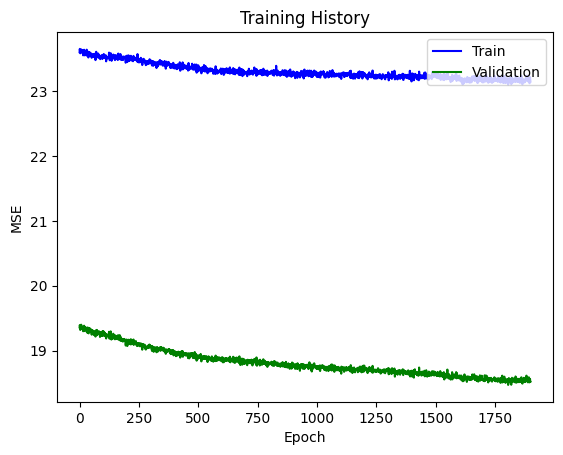

In [28]:
n_skip = 100
plt.plot(my_summary.history['mse'][n_skip:], c="b")
plt.plot(my_summary.history['val_mse'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [29]:
MSE = my_model2.evaluate(X_test, y_test, verbose=0)[1]
RMSE = np.sqrt(MSE)
print("Test RMSE : {}".format(np.round(RMSE, 3)))

Test RMSE : 5.65


In [ ]:
import os
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data_raw = load_iris()
X = data_raw['data']
y0 = data_raw['target'].reshape(-1, 1)

the load_iris() function is used to load the Iris dataset.

The variable X is assigned the feature data (input variables) from the dataset, while y0 is assigned the target labels (output variables), reshaped into a column vector format using reshape(-1, 1).

This reshaping is often necessary to ensure that the target variable has the correct dimensions for model training, especially in frameworks like Keras.

In [ ]:
import tensorflow as tf

In [ ]:
y = tf.keras.utils.to_categorical(y0, num_classes=3)

tf.keras.utils.to_categorical function is used to convert the target labels y0 into a one-hot encoded format. This is particularly useful for classification tasks where the output needs to represent multiple classes.

The num_classes=3 argument specifies that there are three possible classes in the dataset (which is true for the Iris dataset).

As a result, each target label in y0 is transformed into a binary vector, where the index corresponding to the class is set to 1, and all other indices are set to 0. This format is compatible with categorical cross-entropy loss functions used in training classification models.

In [ ]:
header = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species_0', 'Species_1', 'Species_2']
df = pd.DataFrame(np.concatenate([X, y], axis=1), columns=header)
df.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species_0,Species_1,Species_2
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
n_vars = X_train.shape[1]

In [ ]:
my_model = Sequential()
my_model.add(Dense(input_dim=n_vars, units=3, activation="softmax"))

In [ ]:
my_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
n_epochs = 500
batch_size = 10
learn_rate = 0.005

In [ ]:
my_optimizer=Adam(lr=learn_rate)
my_model.compile(loss="categorical_crossentropy", optimizer=my_optimizer, metrics=["accuracy"])

In [ ]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                           validation_split=0.2, verbose=0)

In [ ]:
my_summary.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

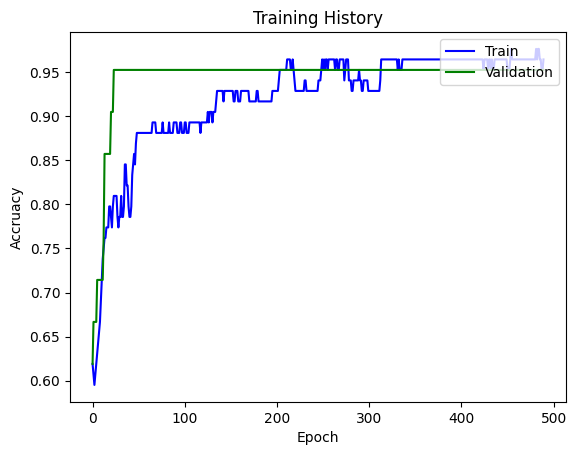

In [ ]:
n_skip = 10
plt.plot(my_summary.history['accuracy'][n_skip:], c="b")
plt.plot(my_summary.history['val_accuracy'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accruacy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC, 3)))

Test Accuracy : 0.911


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

In [ ]:
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (60000, 28, 28)
Training data y shape: (60000,)
--------------------------------------------------
Test data X shape: (10000, 28, 28)
Test data y shape: (10000,)
--------------------------------------------------


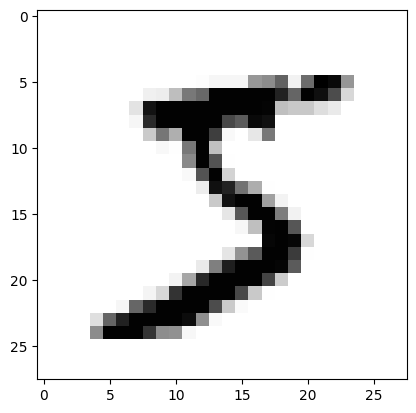

In [ ]:
i_image = 0
plt.imshow(X_train[i_image, :, :], cmap="Greys")
plt.show()

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
y = np.concatenate([y_train, y_test], axis=0)
y = tf.keras.utils.to_categorical(y, 10)
y_train = y[:n_train_size, :]
y_test = y[n_train_size:, :]

by concatenating the training labels (y_train) and test labels (y_test) into a single array y, which combines all the labels from both datasets.

This concatenated array is then transformed into a one-hot encoded format using tf.keras.utils.to_categorical, with num_classes set to 10. This means that each label is represented as a binary vector of length 10, where the index corresponding to the label is set to 1, and all other indices are set to 0, making it suitable for multi-class classification tasks.

Finally, the one-hot encoded array y is sliced back into the original training and test sets: y_train contains the first n_train_size rows, while y_test contains the remaining rows. This process effectively prepares the labels for model training and evaluation.

In [ ]:
drop_prob = 0.5
my_model = Sequential()

my_model.add(Conv2D(input_shape=(28,28,1), filters=32, kernel_size=(5, 5), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=2))

my_model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=2))

my_model.add(Flatten())
my_model.add(Dense(units=1024, activation='relu'))

my_model.add(Dropout(rate=drop_prob))

my_model.add(Dense(units=10, activation='softmax'))

In [ ]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [ ]:
n_epochs = 10
batch_size = 200
learn_rate = 0.001

In [ ]:
my_optimizer=Adam(lr=learn_rate)
my_model.compile(loss="categorical_crossentropy", optimizer=my_optimizer, metrics=["accuracy"])

In [ ]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

Epoch 1/10
240/240 [==============================] - 14s 59ms/step - loss: 0.2049 - accuracy: 0.9374 - val_loss: 0.0615 - val_accuracy: 0.9824
Epoch 2/10
240/240 [==============================] - 15s 61ms/step - loss: 0.0555 - accuracy: 0.9828 - val_loss: 0.0455 - val_accuracy: 0.9863
Epoch 3/10
240/240 [==============================] - 14s 60ms/step - loss: 0.0373 - accuracy: 0.9885 - val_loss: 0.0349 - val_accuracy: 0.9897
Epoch 4/10
240/240 [==============================] - 14s 59ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0280 - val_accuracy: 0.9923
Epoch 5/10
240/240 [==============================] - 14s 60ms/step - loss: 0.0236 - accuracy: 0.9921 - val_loss: 0.0268 - val_accuracy: 0.9933
Epoch 6/10
240/240 [==============================] - 14s 60ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0312 - val_accuracy: 0.9912
Epoch 7/10
240/240 [==============================] - 15s 63ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0338 - val_accuracy:

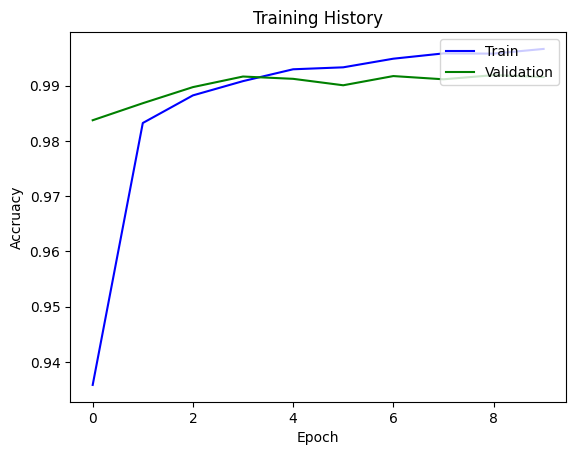

In [ ]:
n_skip = 0
plt.plot(my_summary.history['accuracy'][n_skip:], c="b")
plt.plot(my_summary.history['val_accuracy'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accruacy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC, 3)))

Test Accuracy : 0.993


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

In [ ]:
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (50000, 32, 32, 3)
Training data y shape: (50000, 1)
--------------------------------------------------
Test data X shape: (10000, 32, 32, 3)
Test data y shape: (10000, 1)
--------------------------------------------------


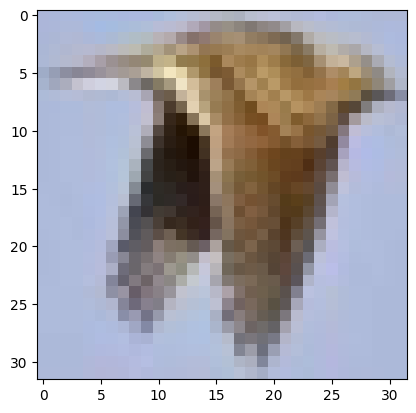

In [ ]:
i_image = 123
plt.imshow(X_train[i_image, :, :])
plt.show()

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

In [ ]:
y = np.concatenate([y_train, y_test], axis=0)
y = tf.keras.utils.to_categorical(y, 10)
y_train = y[:n_train_size, :]
y_test = y[n_train_size:, :]

In [ ]:
drop_prob = 0.7
my_model = Sequential()

my_model.add(Conv2D(input_shape=(32,32,3), filters=32, kernel_size=(5, 5), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=2))

my_model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=2))

my_model.add(Flatten())
my_model.add(Dense(units=1024, activation='relu'))

my_model.add(Dropout(rate=drop_prob))

my_model.add(Dense(units=10, activation='softmax'))

In [ ]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [ ]:
n_epochs = 20
batch_size = 20
learn_rate = 0.0001

In [ ]:
my_optimizer=Adam(lr=learn_rate)
my_model.compile(loss="categorical_crossentropy", optimizer=my_optimizer, metrics=["accuracy"])

In [ ]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.3, verbose=1)

Epoch 1/20
1750/1750 [==============================] - 26s 15ms/step - loss: 1.6305 - accuracy: 0.4033 - val_loss: 1.3104 - val_accuracy: 0.5308
Epoch 2/20
1750/1750 [==============================] - 27s 16ms/step - loss: 1.2847 - accuracy: 0.5405 - val_loss: 1.1356 - val_accuracy: 0.6011
Epoch 3/20
1750/1750 [==============================] - 29s 16ms/step - loss: 1.1401 - accuracy: 0.5968 - val_loss: 1.0476 - val_accuracy: 0.6314
Epoch 4/20
1750/1750 [==============================] - 30s 17ms/step - loss: 1.0417 - accuracy: 0.6339 - val_loss: 1.0230 - val_accuracy: 0.6423
Epoch 5/20
1750/1750 [==============================] - 29s 17ms/step - loss: 0.9529 - accuracy: 0.6652 - val_loss: 1.0365 - val_accuracy: 0.6455
Epoch 6/20
1750/1750 [==============================] - 30s 17ms/step - loss: 0.8880 - accuracy: 0.6882 - val_loss: 0.9493 - val_accuracy: 0.6765
Epoch 7/20
1750/1750 [==============================] - 30s 17ms/step - loss: 0.8261 - accuracy: 0.7100 - val_loss: 0.9386 -

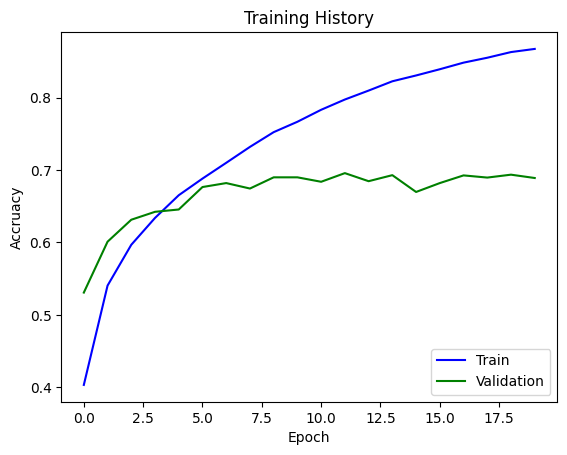

In [ ]:
n_skip = 0
plt.plot(my_summary.history['accuracy'][n_skip:], c="b")
plt.plot(my_summary.history['val_accuracy'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accruacy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC, 3)))

Test Accuracy : 0.687
